<a href="https://colab.research.google.com/github/Vakhranev/MGIMO/blob/main/14%20%D1%84%D0%B5%D0%B2%D1%80%D0%B0%D0%BB%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Описательный анализ данных

**Группирование данных и нормальное распределение**

Это занятие **для начинающих** посвящено описательным статистикам, группированию данных и нормальному распределению. Ряд постов по теме на Хабре см. [здесь](https://habr.com/ru/articles/556000/).

Столбец с данными об электорате Electorate показывает суммарное число зарегистрированных избирателей в каждом избирательном округе:

In [23]:
import scipy as sp
from scipy import stats  # модуль статистических функций
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.read_excel('UK2010.xls')

,Press Association Reference,Constituency Name,Region,Election Year,Electorate,Votes,AC,AD,AGS,APNI,...,UKIP,UPS,UV,VCCA,Vote,Wessex Reg,WRP,You,Youth,YRDPL
0,1.0,Aberavon,Wales,2010.0,50838.0,30958,NaN,NaN,NaN,NaN,...,489.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,Aberconwy,Wales,2010.0,44593.0,29966,NaN,NaN,NaN,NaN,...,632.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,Aberdeen North,Scotland,2010.0,64808.0,37701,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,Aberdeen South,Scotland,2010.0,64031.0,43034,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,Aberdeenshire West & Kincardine,Scotland,2010.0,66110.0,45195,NaN,NaN,NaN,NaN,...,397.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,647.0,Ynys Mon,Wales,2010.0,50075.0,34444,NaN,NaN,NaN,NaN,...,1201.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
647,648.0,York Central,Yorkshire and the Humber,2010.0,76439.0,46483,NaN,NaN,NaN,NaN,...,1100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648,649.0,York Outer,Yorkshire and the Humber,2010.0,75939.0,53300,NaN,NaN,NaN,NaN,...,1100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
649,650.0,Yorkshire East,Yorkshire and the Humber,2010.0,80105.0,51254,NaN,NaN,NaN,NaN,...,2142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
def load_uk():
    '''Загрузить данные по Великобритании'''
    return pd.read_excel('UK2010.xls')

In [8]:
def load_uk_scrubbed():
    '''Загрузить и отфильтровать данные по Великобритании'''
    df = load_uk()
    return df[ df[ 'Election Year' ].notnull() ]

In [9]:
def ex_1_6():
    '''Число значений в поле "Электорат"'''
    return load_uk_scrubbed()['Electorate'].count()

In [10]:
ex_1_6()

650

Мы уже очистили столбец, отфильтровав пустые значения (`nan`) из набора данных, и поэтому предыдущий пример должен вернуть суммарное число избирательных округов.

Описательные статистики, так называемые *сводные статистики*, представляют собой разные подходы к измерению свойств последовательностей чисел.

Среднее значение на самом деле представляет собой один из нескольких способов измерения *центра распределения* данных.

4495dd06da9617989fbe5319a1972386.svg

Среднее значение числового ряда вычисляется на Python следующим образом:

In [11]:
def mean(xs):
    '''Среднее значение числового ряда'''
    return sum(xs) / len(xs)

Мы можем воспользоваться нашей новой функцией `mean` для вычисления среднего числа избирателей в Великобритании:

In [12]:
def ex_1_7():
    '''Вернуть среднее значение поля "Электорат"'''
    return mean( load_uk_scrubbed()['Electorate'] )

In [13]:
ex_1_7()

70149.94

В нашем случае функцию mean, которая уже содержится в библиоттеке pandas, можно применить следующим образом:

In [14]:
load_uk_scrubbed()['Electorate'].mean()

70149.94

Если в последовательности число точек данных четное, то медиана определяется, как полусумма двух срединных значений.

In [15]:
def median(xs):
    '''Медиана числового ряда'''
    n = len(xs)
    mid = n // 2
    if n % 2 == 1:
        return sorted(xs)[mid]
    else:
        return mean( sorted(xs)[mid-1:][:2] )

Медианное значение электората Великобритании составляет:

In [16]:
def ex_1_8():
    '''Вернуть медиану поля "Электорат"'''
    return median( load_uk_scrubbed()['Electorate'] )

In [17]:
ex_1_8()

70813.5

Библиотека pandas тоже располагает встроенной функцией для вычисления медианного значения, которая так и называется `median`.

На языке математики дисперсия обозначается следующим образом:

0b9c93359e92b78696a3425945a63725.svg

где s2  — это математический символ, который часто используют для обозначения дисперсии.

Выражение

ae670e8b960092ff4386b2ce3f8b9602.svg

In [18]:
def variance(xs):
    '''Дисперсия (варианс) числового ряда,
       несмещенная дисперсия при n <= 30'''
    mu = mean(xs)
    n = len(xs)
    n = n-1 if n in range(1, 30) else n
    square_deviation = lambda x : (x - mu) ** 2
    return sum( map(square_deviation, xs) ) / n

Для вычисления квадрата выражения используется оператор языка Python возведения в степень `**`.

В результате приведения единицы измерения к более естественному виду, снова обозначающему «людей», получим так называемое *стандартное отклонение*, или среднеквадратичное отклонение:

In [24]:
def standard_deviation(xs):
    '''Стандартное отклонение числового ряда'''
    return np.sqrt( variance(xs) )

def ex_1_9():
    '''Стандартное отклонение поля "Электорат"'''
    return standard_deviation( load_uk_scrubbed()['Electorate'] )

In [25]:
ex_1_9()

7672.772645446216

В библиотеке pandas функции для вычисления дисперсии (варианса) и стандартного отклонения имплементированы соответственно, как `var` и `std`. При этом последняя по умолчанию вычисляет несмещенное значение, поэтому, чтобы получить тот же самый результат, нужно применить именованный аргумент `ddof=0`, который сообщает, что требуется вычислить смещенное значение стандартного отклонения:

In [26]:
load_uk_scrubbed()['Electorate'].std( ddof=0 )

7672.772645446216

Медиана представляет собой один из способов вычислить *срединное* значение из списка, т.е. находящееся ровно по *середине*, дисперсия же предоставляет способ измерить разброс данных вокруг среднего значения.

Для примера рассмотрим следующую ниже последовательность чисел:

`[10 11 15 21 22.5 28 30]`

0.0 (нулевой), 0.25, 0.5, 0.75 и 1.0 квантили иногда упоминаются в связи с *пятичисловой сводкой*.

Квантили можно вычислить непосредственно в pandas при помощи функции `quantile`. Последовательность требующихся квантилей передается в виде списка.

In [27]:
def ex_1_10():
    '''Вычислить квантили:
       возвращает значение в последовательности xs,
       соответствующее p-ому проценту'''
    q = [0, 1/4, 1/2, 3/4, 1]
    return load_uk_scrubbed()['Electorate'].quantile(q=q)

In [28]:
ex_1_10()

,Electorate
0.00,21780.00
0.25,65929.25
0.50,70813.50
0.75,74948.50
1.00,109922.00


Когда квантили делят диапазон на четыре равных диапазона, как показано выше, то они называются *квартилями*. Разница между нижним (0.25) и верхним (0.75) квартилями называется *межквартильным размахом*, или иногда сокращенно МКР.

В целях развития интуитивного понимания в отношении того, что именно все эти расчеты разброса значений измеряют, мы можем применить метод под названием *группировка в частотные корзины* (binning). Когда данные имеют непрерывный характер, использование специального словаря для подсчета частот `Counter` (подобно тому, как он использовался при подсчете количества пустых значений в наборе данных об электорате) становится нецелесообразным, поскольку никакие два значения не могут быть одинаковыми. Между тем, общее представление о структуре данных можно все-равно получить, сгруппировав для этого данные в частотные *корзины* (bins).

Подсчитав количества точек, попадающих в каждую корзину, мы можем получить представление о разбросе данных:

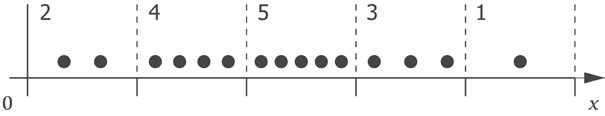

На приведенном выше рисунке показано 15 значений *x*, разбитых на 5 равноразмерных корзин.

Следующая ниже функция Python `nbin` позволяет добиться того же самого результата:

In [29]:
def nbin(n, xs):
    '''Разбивка данных на частотные корзины'''
    min_x, max_x = min(xs), max(xs)
    range_x = max_x - min_x
    fn = lambda x: min( int((abs(x) - min_x) / range_x * n), n-1 )
    return map(fn, xs)

Например, мы можем разбить диапазон 0-14 на 5 корзин следующим образом:

In [30]:
list( nbin(5, range(15)) )

[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4]

После того, как мы разбили значения на корзины, мы можем в очередной раз воспользоваться словарем `Counter`, чтобы подсчитать количество точек в каждой корзине. В следующем ниже примере мы воспользуемся этим словарем для разбиения данных об электорате Великобритании на пять корзин:

In [33]:
from collections import Counter

def ex_1_11():
    '''Разбиmь электорат Великобритании на 5 корзин'''
    series = load_uk_scrubbed()['Electorate']
    return Counter( nbin(5, series) )

In [34]:
ex_1_11()

Counter({1: 26, 2: 450, 3: 171, 4: 1, 0: 2})

Мы уже увидели, каким образом можно выполнить разбиение данных на корзины самостоятельно, однако в библиотеке pandas уже содержится функция `hist`, которая разбивает данные и визуализирует их в виде гистограммы.

In [35]:
def ex_1_12():
    '''Построить гистограмму частотных корзин
       электората Великобритании'''
    load_uk_scrubbed()['Electorate'].hist()
    plt.xlabel('Электорат Великобритании')
    plt.ylabel('Частота')
    plt.show()

Приведенный выше пример сгенерирует следующий ниже график:

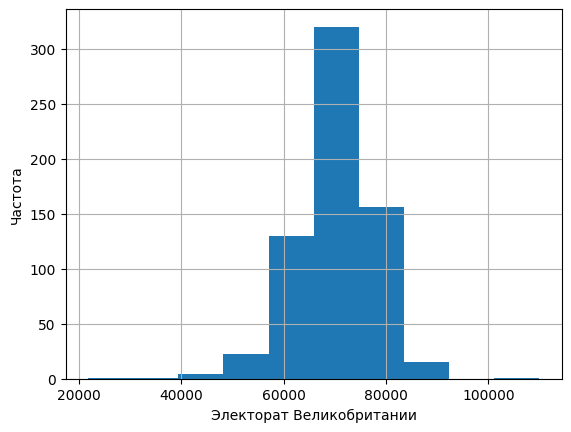

In [36]:
ex_1_12()

Число корзин, на которые данные разбиваются, можно сконфигурировать, передав в функцию при построении гистограммы именованный аргумент `bins`:

In [37]:
def ex_1_13():
    '''Построить гистограмму частотных корзин
       электората Великобритании с 200 корзинами'''
    load_uk_scrubbed()['Electorate'].hist(bins=200)
    plt.xlabel('Электорат Великобритании')
    plt.ylabel('Частота')
    plt.show()

Следующий ниже график показывает мелкие детали, но величина столбцов делает неясной форму распределения, в особенности в хвостах:

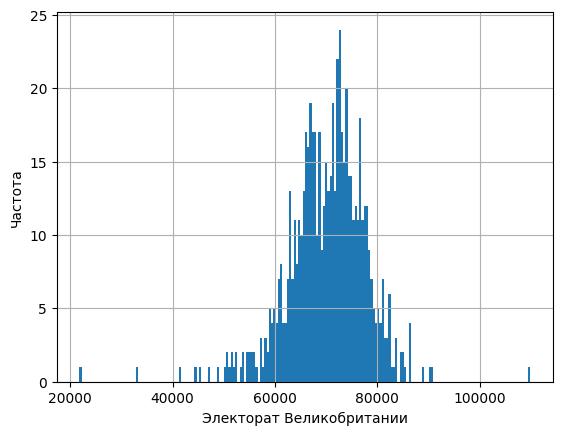

In [38]:
ex_1_13()

При выборе количества корзин для представления данных следует найти точку равновесия — с малым количеством корзин форма данных будет представлена лишь приблизительно, а слишком большое их число приведет к тому, что шумовые признаки могут заслонить лежащую в основании структуру.

In [39]:
def ex_1_14():
    '''Построить гистограмму частотных корзин
       электората Великобритании с 20 корзинами'''
    load_uk_scrubbed()['Electorate'].hist(bins=20)
    plt.xlabel('Электорат Великобритании')
    plt.ylabel('Частота')
    plt.show()

Ниже показана гистограмма теперь уже из 20 корзин:

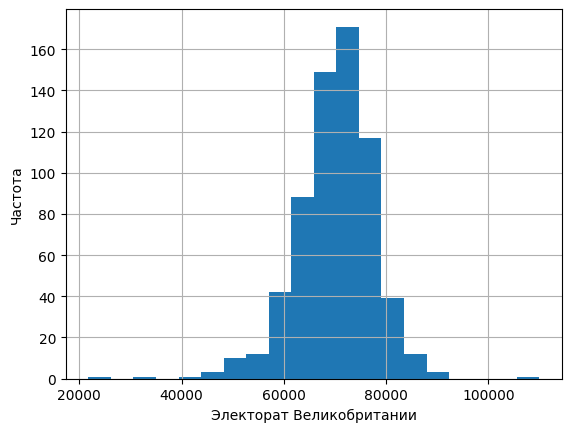

In [40]:
ex_1_14()

*Мода* — это значение, встречающееся в последовательности наиболее часто.

В анализе данных многие распределения встречаются часто, но ни одно не встречается также часто, как нормальное распределение, именуемое также *гауссовым распределением*.

В программировании типичным распределением является *равномерное* распределение. Оно представлено распределением чисел, генерируемых функцией библиотеки scipy `stats.uniform.rvs`: в справедливом генераторе случайных чисел все числа имеют равные шансы быть сгенерированными. Мы можем увидеть это на гистограмме, многократно генерируя серию случайных чисел между 0 и 1 и затем построив график с результатами.

In [41]:
def ex_1_15():
    '''Показать гистограмму равномерного распределения
       синтетического набора данных'''
    xs = stats.uniform.rvs(0, 1, 10000)
    pd.Series(xs).hist(bins=20)
    plt.xlabel('Равномерное распределение')
    plt.ylabel('Частота')
    plt.show()

Обратите внимание, что в этом примере мы впервые использовали тип `Series` библиотеки pandas для числового ряда данных.

Приведенный выше пример создаст следующую гистограмму:

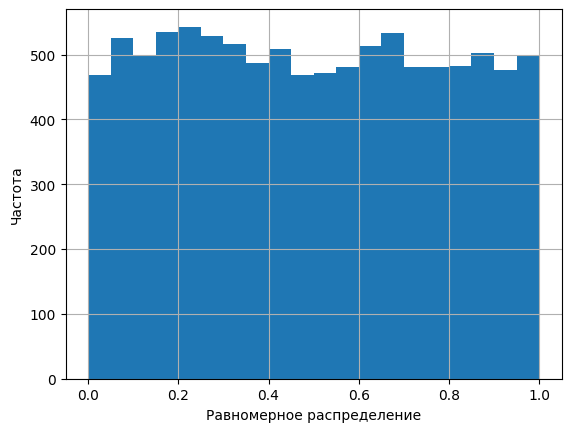

In [42]:
ex_1_15()

Если напротив сгенерировать гистограмму средних значений последовательностей чисел, то в результате получится распределение, которое выглядит совсем непохоже.

In [45]:
def bootstrap(xs, n, replace=True):
    '''Вернуть список массивов меньших размеров
       по n элементов каждый'''
    return np.random.choice(xs, (len(xs), n), replace=replace)

def ex_1_16():
    '''Построить гистограмму средних значений'''
    xs = stats.uniform.rvs(loc=0, scale=1, size=10000)
    pd.Series( map(np.mean, bootstrap(xs, 10)) ).hist(bins=20)
    plt.xlabel('Распределение средних значений')
    plt.ylabel('Частота')
    plt.show()

Приведенный выше пример сгенерирует результат, аналогичный следующей ниже гистограмме:

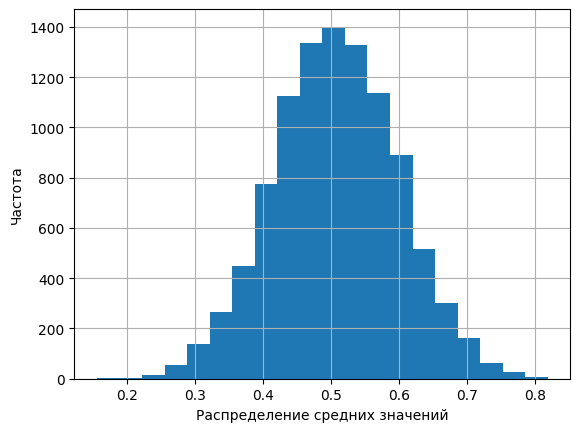

In [46]:
ex_1_16()

Этот результат, когда средний эффект множества мелких случайных колебаний в итоге приводит к нормальному распределению, называется *центральной предельной теоремой*, иногда сокращенно *ЦПТ*, и играет важную роль для объяснения, почему нормальное распределение встречается так часто в природных явлениях.

В отличие от центральной предельной теоремы, которая позволяет получать выборки из приближенно нормального распределения, библиотека scipy содержит функции для эффективного генерирования выборок из самых разнообразных статистических распределений, включая нормальное:

In [47]:
def ex_1_17():
    '''Показать гистограмму нормального распределения
       синтетического набора данных'''
    xs = stats.norm.rvs(loc=0, scale=1, size=10000)
    pd.Series(xs).hist(bins=20)
    plt.xlabel('Нормальное распределение')
    plt.ylabel('Частота')
    plt.show()

Отметим, что в функции `sp.random.normal` параметр `loc` – это среднее значение, `scale` – дисперсия и `size` – размер выборки. Приведенный выше пример сгенерирует следующую гистограмму нормального распределения:

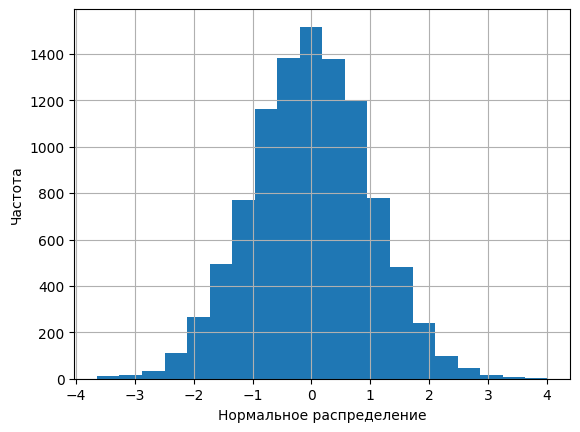

In [48]:
ex_1_17()

**Как сравнивать распределения. От визуализации до статистических тестов**

Мы смоделировали набор данных на 1000 человек, для которых мы наблюдаем набор характеристик.

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Обновлённая функция генерации данных
def generate_data_updated(n=1000):
    np.random.seed(42)  # Для воспроизводимости

    # Генерация групп с разным размером
    groups = np.random.choice(['control', 'treatment'], size=n, p=[0.7, 0.3])  # 70% контроль, 30% эксперим.
    arms = np.where(groups == 'treatment', np.random.choice(['arm 1', 'arm 2', 'arm 3', 'arm 4'], size=n), np.nan)
    genders = np.random.choice([0, 1], size=n, p=[0.49, 0.51])  # 49% male, 51% female
    ages = np.where(groups == 'control',
                    np.random.normal(loc=32, scale=8, size=n),  # Увеличенный возраст для контроля
                    np.random.normal(loc=36, scale=7, size=n))  # Увеличенный возраст для эксперимента
    ages = ages.round(1)

    # Разное распределение доходов для групп
    incomes = np.where(groups == 'control',
                       np.random.normal(loc=525, scale=117, size=n),  # Контрольная группа
                       np.random.normal(loc=540, scale=160, size=n))  # Экспериментальная группа
    incomes = incomes.round(2)

    # Создание DataFrame
    df = pd.DataFrame({
        'Group': groups,
        'Arm': arms,
        'Gender': genders,
        'Age': ages,
        'Income': incomes
    })
    return df

# Генерация обновлённых данных
df = generate_data_updated()

# Отображение первых строк
print(df.head())

       Group    Arm  Gender   Age  Income
0    control    nan       1  36.2  530.77
1  treatment  arm 4       0  28.6  589.45
2  treatment  arm 2       0  44.6  435.09
3    control    nan       0  32.7  567.48
4    control    nan       0  30.4  561.40


Для большинства визуализаций я буду использовать библиотеку Python [seaborn](https://seaborn.pydata.org/).

Эта диаграмма предоставляет сводную статистику (ящик и «усы»), а также прямую визуализацию данных — выбросы:

Text(0.5, 1.0, 'Boxplot')

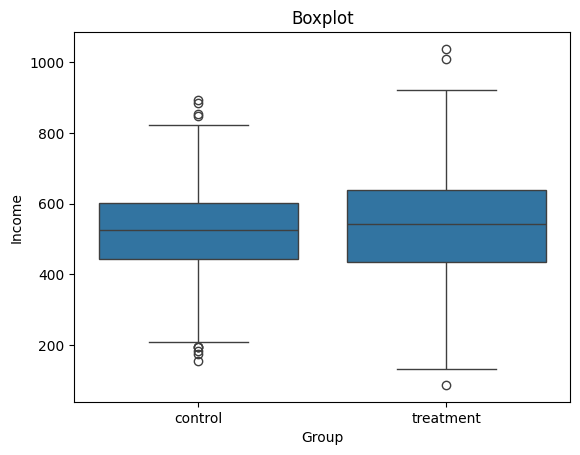

In [150]:
import seaborn as sns
sns.boxplot(data=df, x='Group', y='Income')
plt.title("Boxplot")

Гистограмма группирует данные в интервалы («бины») одинаковой ширины и отображает количество наблюдений в каждом интервале.

Text(0.5, 1.0, 'Histogram')

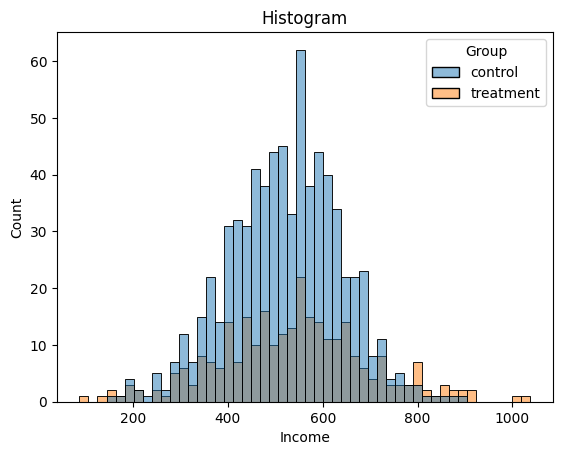

In [151]:
sns.histplot(data=df, x='Income', hue='Group', bins=50)
plt.title("Histogram")

С этими диаграммами есть несколько проблем:

* Количество наблюдений в группах разное, поэтому гистограммы несопоставимы.

* Количество бинов произвольное.

Решить первую проблему можно через параметр stat для построения диаграммы плотности вместо количества и установив для параметра common_norm значение False, чтобы нормализовать каждую гистограмму отдельно.

Text(0.5, 1.0, 'Density Histogram')

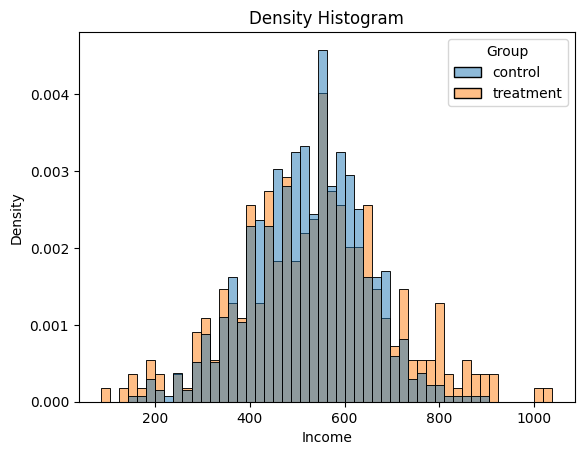

In [152]:
sns.histplot(data=df, x='Income', hue='Group', bins=50, stat='density', common_norm=False)
plt.title("Density Histogram")

Одно из возможных решений — использовать метод ядерной оценки плотности, который пытается аппроксимировать гистограмму непрерывной функцией при помощи ядерной оценки плотности (KDE).

Text(0.5, 1.0, 'Kernel Density Function')

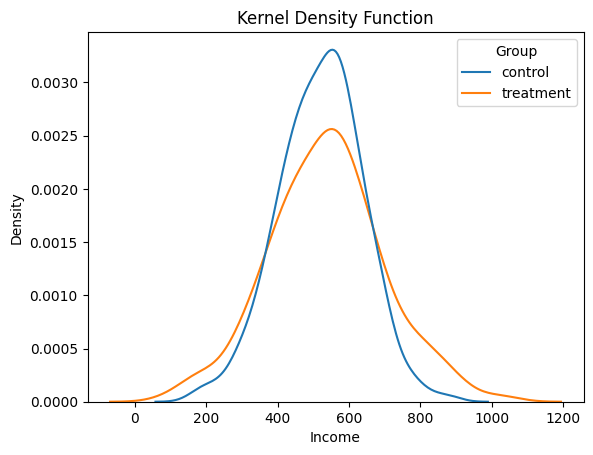

In [153]:
sns.kdeplot(x='Income', data=df, hue='Group', common_norm=False)
plt.title("Kernel Density Function")

Основные преимущества кумулятивной функции распределения заключаются в том, что:

* не нужно выбирать произвольно (например, количество бинов);

* не нужна никакая аппроксимация (как с ядерной оценкой плотности), но мы представляем все точки данных.

Text(0.5, 1.0, 'Cumulative distribution function')

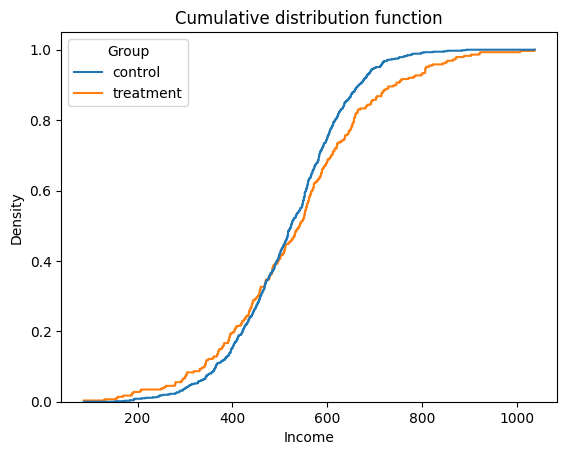

In [154]:
sns.histplot(x='Income', data=df, hue='Group', bins=len(df), stat="density",
      element="step", fill=False, cumulative=True, common_norm=False)
plt.title("Cumulative distribution function")

Как же интерпретировать график?

* Две линии пересекаются примерно в точке 0,4 (ось Y), а значит, их медианы cхожи

* Оранжевая линия выше синей линии слева и ниже этой линии справа: распределение экспериментальной группы имеет более толстые хвосты.

В Python нет встроенной функции графика квантиль–квантиль, и, хотя пакет statsmodels предоставляет функцию [qqplot](https://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot.html), он довольно громоздкий.

Во-первых, вычислим квартили двух групп функцией percentile.

In [155]:
income = df['Income'].values
income_t = df.loc[df.Group=='treatment', 'Income'].values
income_c = df.loc[df.Group=='control', 'Income'].values

df_pct = pd.DataFrame()
df_pct['q_treatment'] = np.percentile(income_t, range(100))
df_pct['q_control'] = np.percentile(income_c, range(100))

Теперь можно построить два распределения квантилей относительно друг друга, а как эталон взять линию под углом около 45 градусов:

Text(0.5, 1.0, 'QQ plot')

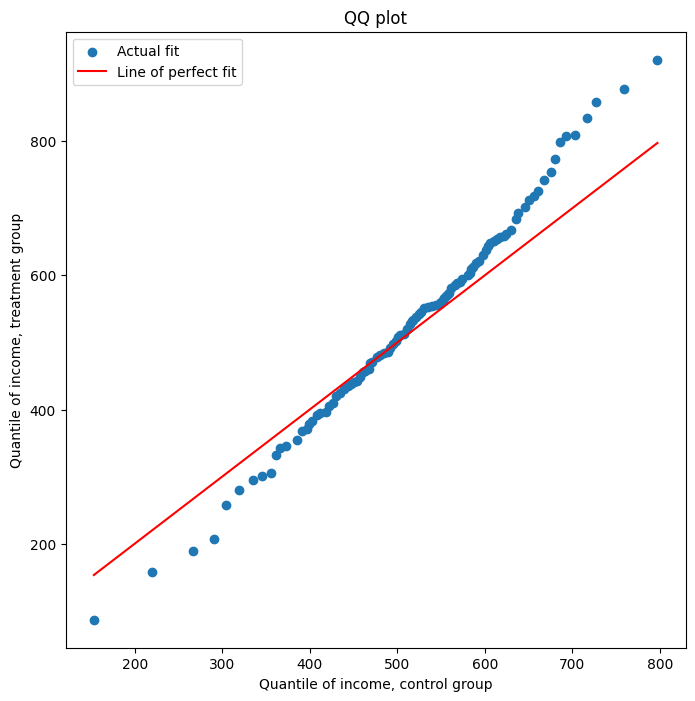

In [156]:
plt.figure(figsize=(8, 8))
plt.scatter(x='q_control', y='q_treatment', data=df_pct, label='Actual fit')
sns.lineplot(x='q_control', y='q_control', data=df_pct, color='r', label='Line of perfect fit')
plt.xlabel('Quantile of income, control group')
plt.ylabel('Quantile of income, treatment group')
plt.legend()
plt.title("QQ plot")

Статистика теста для теста сравнения двух средних определяется таким образом:

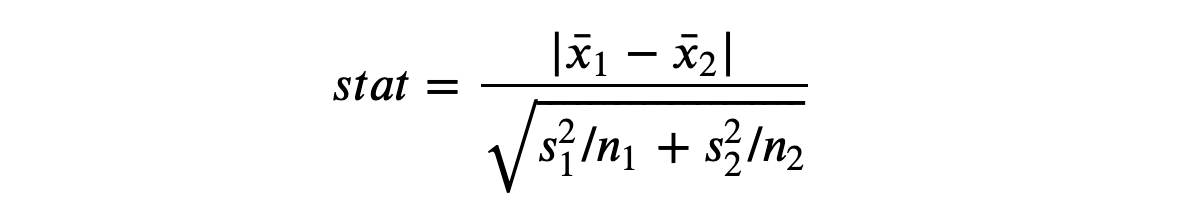

Функция ttest_ind из scipy возвращает тестовую статистику и предполагаемое p-значение.

In [145]:
from scipy.stats import ttest_ind

stat, p_value = ttest_ind(income_c, income_t)
print(f"t-test: statistic={stat:.4f}, p-value={p_value:.4f}")

t-test: statistic=0.8080, p-value=0.4193


Как следует из названия метода стандартизация разности средних (SMD), это не строго тестовая статистика, а просто стандартизированная разница, вычислить которую можно так:

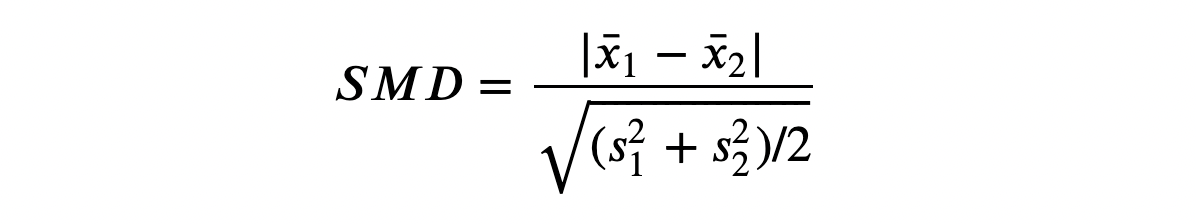

Хорошая практика — собрать средние значения всех переменных в экспериментальной и контрольной группах, а также измерить расстояния между ними — либо t-критерий, либо SMD — и занести в так называемую балансовую таблицу, для создания которой можно воспользоваться функцией [create_table_one](https://causalml.readthedocs.io/en/latest/causalml.html#module-causalml.match) из библиотеки [causalml](https://causalml.readthedocs.io/en/latest/about.html). Как следует из названия функции, балансовая таблица всегда должна быть первой таблицей, которую вы представляете при выполнении A/B-тестирования.

In [147]:
!pip install causalml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.3/144.3 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.2 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: Cython
    Found existing installation: Cython 3.0.11
    Uninstalling Cython-3.0.11:
      Successfully uninstall

In [157]:
from causalml.match import create_table_one

df['treatment'] = df['Group']=='treatment'
create_table_one(df, 'treatment', ['Gender', 'Age', 'Income'])

,Control,Treatment,SMD
Variable,,,
n,712,288,
Age,32.33 (7.72),36.08 (7.30),0.4994
Gender,0.52 (0.50),0.50 (0.50),-0.0406
Income,520.73 (118.62),536.26 (161.70),0.1095


И вот процедура расчёта U-критерия Манна-Уитни:

1. Объедините все точки данных и ранжируйте их в порядке возрастания или убывания.

1. Вычислите U₁ = R₁ − n₁(n₁ + 1)/2, где R₁ — сумма рангов точек данных в первой группе, а n₁ — количество точек в первой группе.

1. Аналогично вычислите U₂ для второй группы.

1. Тестовая статистика рассчитывается как stat = min(U₁, U₂).

Мы проводим тест при помощи mannwhitneyu из scipy:

In [158]:
from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(income_t, income_c)
print(f" Mann–Whitney U Test: statistic={stat:.4f}, p-value={p_value:.4f}")

 Mann–Whitney U Test: statistic=107818.5000, p-value=0.2009


Давайте использовать в качестве тестовой статистики разницу в выборочных средних между экспериментальной и контрольной группами.

In [159]:
sample_stat = np.mean(income_t) - np.mean(income_c)
stats = np.zeros(1000)
for k in range(1000):
  labels = np.random.permutation((df['Group'] == 'treatment').values)
  stats[k] = np.mean(income[labels]) - np.mean(income[labels==False])
p_value = np.mean(stats > sample_stat)

print(f"Permutation test: p-value={p_value:.4f}")

Permutation test: p-value=0.0630


Тест можно визуализировать: построить диаграмму распределения статистики теста по перестановкам в зависимости от его выборочного значения.

Text(0.5, 1.0, 'Permutation Test')

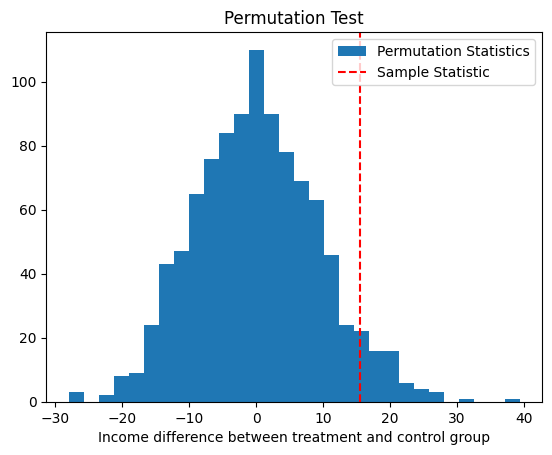

In [160]:
plt.hist(stats, label='Permutation Statistics', bins=30)
plt.axvline(x=sample_stat, c='r', ls='--', label='Sample Statistic')
plt.legend()
plt.xlabel('Income difference between treatment and control group')
plt.title('Permutation Test')

Мы генерируем ячейки, соответствующие децилям распределения дохода в контрольной группе, а затем вычисляем ожидаемое количество наблюдений в каждой ячейке в экспериментальной группе, если два распределения были одинаковыми.

In [161]:
# Инициализируем dataframe
df_bins = pd.DataFrame()

# Сгенерировать ячейки из контрольной группы
_, bins = pd.qcut(income_c, q=10, retbins=True)
df_bins['bin'] = pd.cut(income_c, bins=bins).value_counts().index

# Применить ячейки к обеим группам
df_bins['income_c_observed'] = pd.cut(income_c, bins=bins).value_counts().values
df_bins['income_t_observed'] = pd.cut(income_t, bins=bins).value_counts().values

# Рассчитать ожидаемую частоту в экспериментальной группе лечения
df_bins['income_t_expected'] = df_bins['income_c_observed'] / np.sum(df_bins['income_c_observed']) * np.sum(df_bins['income_t_observed'])

df_bins

,bin,income_c_observed,income_t_observed,income_t_expected
0,"(153.33, 366.062]",71,35,28.060478
1,"(366.062, 422.144]",71,29,28.060478
2,"(422.144, 460.365]",71,27,28.060478
3,"(460.365, 494.888]",71,20,28.060478
4,"(494.888, 524.755]",71,19,28.060478
5,"(524.755, 555.888]",71,26,28.060478
6,"(555.888, 583.874]",71,25,28.060478
7,"(583.874, 617.466]",71,24,28.060478
8,"(617.466, 667.61]",71,32,28.060478
9,"(667.61, 893.79]",72,44,28.455696


Тестовая статистика задаётся следующим образом:
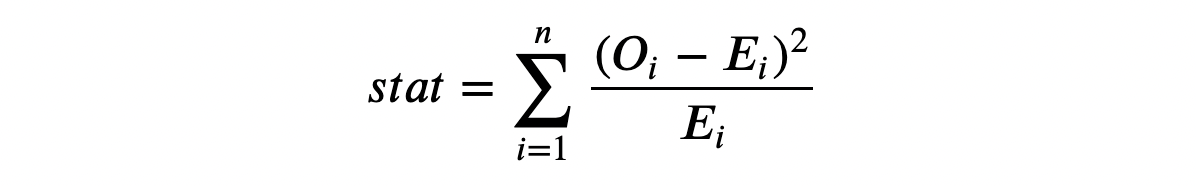

Чтобы вычислить статистику теста и p-значение теста, воспользуемся функцией chisquare из scipy:

In [162]:
from scipy.stats import chisquare

stat, p_value = chisquare(df_bins['income_t_observed'], df_bins['income_t_expected'])
print(f"Chi-squared Test: statistic={stat:.4f}, p-value={p_value:.4f}")

Chi-squared Test: statistic=17.1457, p-value=0.0465


Статистика теста Колмогорова — Смирнова представляет собой максимальную абсолютную разницу между двумя кумулятивными распределениями.

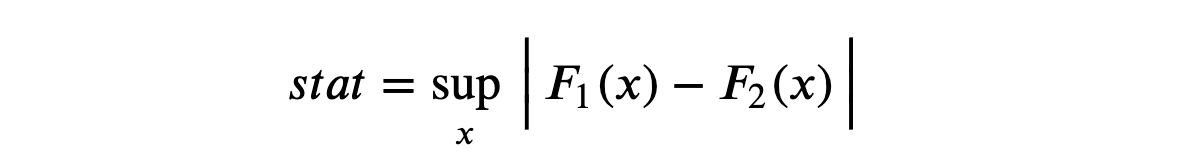

Во-первых, вычислим кумулятивные функции распределения.

In [163]:
df_ks = pd.DataFrame()
df_ks['Income'] = np.sort(df['Income'].unique())
df_ks['F_control'] = df_ks['Income'].apply(lambda x: np.mean(income_c<=x))
df_ks['F_treatment'] = df_ks['Income'].apply(lambda x: np.mean(income_t<=x))
df_ks.head()

,Income,F_control,F_treatment
0,86.72,0.000000,0.003472
1,131.43,0.000000,0.006944
2,153.33,0.001404,0.006944
3,155.41,0.001404,0.010417
4,158.51,0.001404,0.013889


Теперь нужно найти точку, где абсолютное расстояние между кумулятивными функциями распределения наибольшее.

In [164]:
k = np.argmax( np.abs(df_ks['F_control'] - df_ks['F_treatment']))
ks_stat = np.abs(df_ks['F_treatment'][k] - df_ks['F_control'][k])

Можно также визуализировать значение тестовой статистики: построить две кумулятивные функции распределения и значение тестовой статистики.

Text(0.5, 1.0, 'Kolmogorov-Smirnov Test')

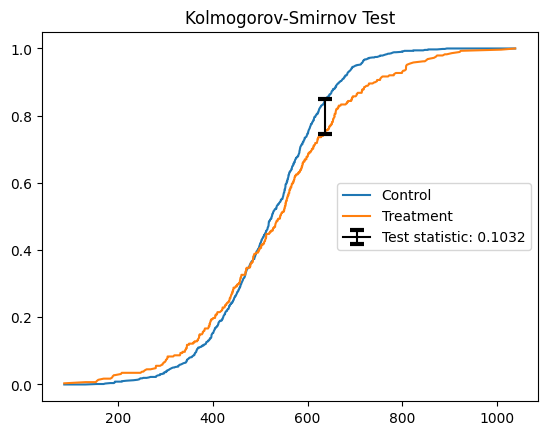

In [165]:
y = (df_ks['F_treatment'][k] + df_ks['F_control'][k])/2
plt.plot('Income', 'F_control', data=df_ks, label='Control')
plt.plot('Income', 'F_treatment', data=df_ks, label='Treatment')
plt.errorbar(x=df_ks['Income'][k], y=y, yerr=ks_stat/2, color='k',
      capsize=5, mew=3, label=f"Test statistic: {ks_stat:.4f}")
plt.legend(loc='center right')
plt.title("Kolmogorov-Smirnov Test")

А теперь можно выполнить сам тест, используя функцию kstest из scipy.

In [166]:
from scipy.stats import kstest

stat, p_value = kstest(income_t, income_c)
print(f" Kolmogorov-Smirnov Test: statistic={stat:.4f}, p-value={p_value:.4f}")

 Kolmogorov-Smirnov Test: statistic=0.1032, p-value=0.0233


Диаграмма размаха масштабируется очень хорошо, когда у нас есть несколько групп из однозначных чисел: разные блоки можно расположить рядом.

Text(0.5, 1.0, 'Boxplot, multiple groups')

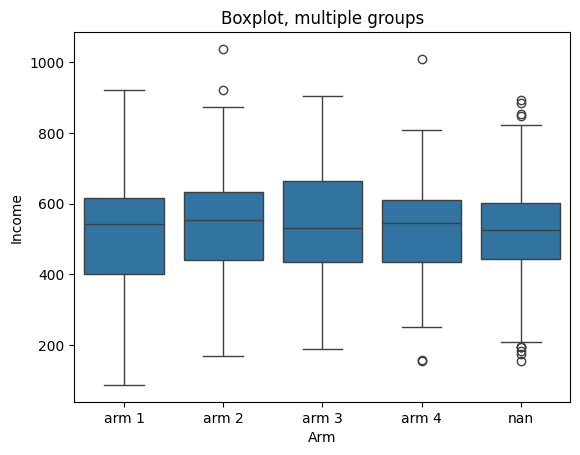

In [167]:
sns.boxplot(x='Arm', y='Income', data=df.sort_values('Arm'))
plt.title("Boxplot, multiple groups")

По умолчанию внутри скрипичной диаграммы добавляется миниатюрная диаграмма.

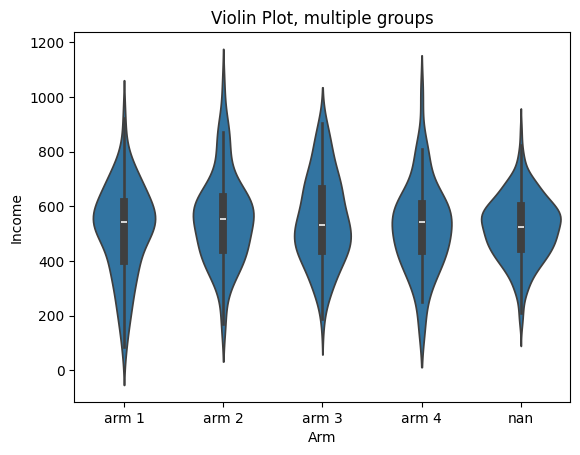

In [168]:
sns.violinplot(x='Arm', y='Income', data=df.sort_values('Arm'))
plt.title("Violin Plot, multiple groups")

Импортировать групповую хребтовую диаграмму нужно из [joypy](https://github.com/leotac/joypy).

In [169]:
!pip install joypy

Text(0.5, 1.0, 'Ridgeline Plot, multiple groups')

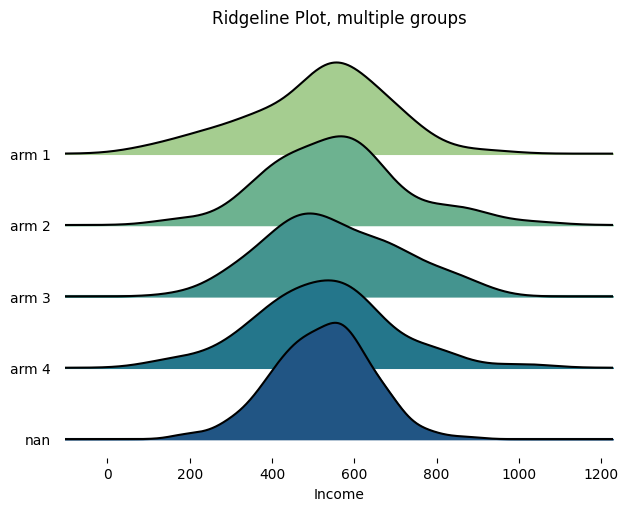

In [170]:
from joypy import joyplot

joyplot(df, by='Arm', column='Income', colormap=sns.color_palette("crest", as_cmap=True))
plt.xlabel('Income')
plt.title("Ridgeline Plot, multiple groups")

Статистика F-теста определяется как:

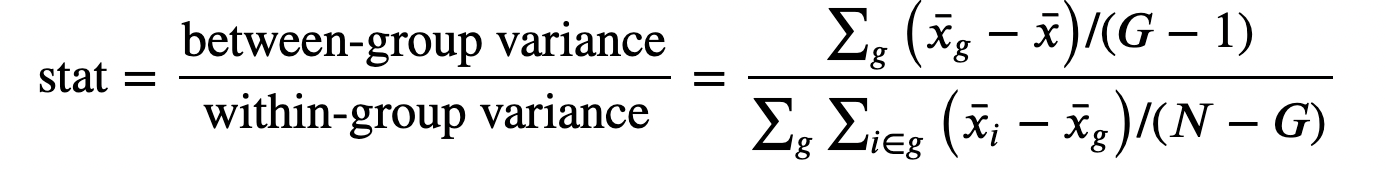

При нулевой гипотезе о независимости группы f-статистика обладает F-распределением.

In [171]:
from scipy.stats import f_oneway

income_groups = [df.loc[df['Arm']==arm, 'Income'].values for arm in df['Arm'].dropna().unique()]
stat, p_value = f_oneway(*income_groups)
print(f"F Test: statistic={stat:.4f}, p-value={p_value:.4f}")

F Test: statistic=1.9291, p-value=0.1034
